# A Simulated Dataset of a Real-World Phenomenom

## Introduction

The real-world phenomenom that I will be looking at is the relationship between all-cause mortality and either obesity or underweight. Obesity grades 2 and 3 (BMI >/= 35) is associated with an aproximate 30% increase in all-cause mortality compared to normal weight [1]. Underweight is associated with a 37% increase in all-cause mortality compared to normal weight [2]. All-cause mortality is any cause of death, not just those caused by the specific condition being examined (in this case obesity or underweight) [3]. 

Underweight is associated with an increase in mortality due to external factors such as drug and alcohol abuse, smoking and fraility, with smoking being a particular risk factor [2].

This dataset can be used to predict the number of people in a population that will suffer from obesity or underweight and therefore an increase in all-cause mortality.

## Investigation

The variables examined here are as follows:
* Sex (categorical)
* Weight (continuous)
* Height (continuous)
* BMI (continuous)
* BMI Category (categorical)
* Risk of all-cause mortality (categorical)

For sex, there are different mean average weights and heights for males and females. Males on average are heavier and taller than females [4]. However due to the fact that BMI is calculated from weight/ height^2, the BMI differences between males and females is small (27.5 for males compared to 26.4 for females) [4].




We'll start by importing some libraries

In [1]:
# Numpy will be used to generate pseudo random distributions 
import numpy as np

# Pandas will be used to create final data set
import pandas as pd

# Matplotlib will be used to plot distributions
import matplotlib.pyplot as plt

# Seaborn will also be used to plot distributions
import seaborn as sns

# Skewnorm function from scipy.stats can create skewed normal distributions 
# From https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html#scipy.stats.skewnorm 
from scipy.stats import skewnorm

### Sex ratio

The ratio of males to females in Ireland are:

Aged 15 to 24: 301,114 males and 292,055 females (1.03 m/f) [5]

Aged 25 to 54: 1,087,587 males and 1,077,383 females (1.01 m/f) [5] 

Aged 55 to 64: 261,650 males and 260,737 females (1 m/f) [5]

Young males out number young females due to the fact that female mortality during pregnancy is higher than for males [6]. The ratio of males to females reduces as age increaeses due to factors such as war and health [7].

We can find out what the total number of males, females and both sexes are as follows:

In [2]:
# Number of males and females in Ireland aged 15 to 64 years old
males = 301114 + 1087587 + 261650
females = 292055 + 1077383 + 260737

# Total number of adults in Ireland aged 15 to 64 years old
total = males + females

# Displaying the results
print(f"The number of males aged 15 to 64 in Ireland is {males}")
print(f"The number of females aged 15 to 64 in Ireland is {females}")
print(f"The total number of males and females aged 15 to 64 in Ireland is {total}")      

The number of males aged 15 to 64 in Ireland is 1650351
The number of females aged 15 to 64 in Ireland is 1630175
The total number of males and females aged 15 to 64 in Ireland is 3280526


We can now find out what the proportion of males and females are:

In [3]:
# Proportion of males in Ireland aged 15 to 64
proportionOfMales = males/total

# Proportion of females in Ireland aged 15 to 64
proportionOfFemales = females/total

# Displaying the proportion of males
print(f"The proportion of males is {proportionOfMales}")

# Displaying the proportion of females
print(f"The proportion of females is {proportionOfFemales}")

The proportion of males is 0.5030751166123969
The proportion of females is 0.4969248833876031


The figures below for weight and height are for 18 to 64 year olds. Here an assumption will be made that the ratio for males to females in Ireland aged 18 to 64 year olds will be the same as 15 to 64 year olds. However, as can be seen from the ratios above, the number of males to females decreases as age increases (1.03 for 15 to 24 year olds, 1.01 for 25 to 54 and 1.00 for 55 to 64 years).

We can now create a random sample of 1000 people which will have the same ratio of males to females as was found above

In [4]:
# Creating a 1D array with male and female as the elements
sex =["male", "female"]

# Setting sample size to 2000
sampleSize = 2000

# Creating an array of randomly chosen adults in the proportions given above
sexArray = np.random.choice(sex, sampleSize, p=[proportionOfMales, proportionOfFemales])

# Using np.unique to display the unique elements in the array and the count for each
unique, count = np.unique(sexArray, return_counts=True)
 
femaleCount, maleCount = count[0], count[1]

# Displaying the results
print(f"The unique elements in the array are: {unique}")
print(f"There are {femaleCount} females and {maleCount} males")

The unique elements in the array are: ['female' 'male']
There are 1007 females and 993 males


#### Weight

Mean adult (18 to 64 years old) male body weight is 86.2 kg with a standard deviation of 15.0 kg [4].

Mean adult (18 to 64 years old) female bodyweight is 70.0 kg with a standard deviation of 13.7 kg [4].

In [5]:
# Assigning variables for mean weight and standard deviation for males
meanMaleWeight, maleWeightSD = 86.2, 15.0

# Assigning variables for mean weight and standard deviation for females
meanFemaleWeight, femaleWeightSD = 70.0, 13.7

The median values for males and females are 85.1 kg and 67.5 kg respectively. The distributions for weight for males and females are therefore are both positively skewed. We can also see this by examining the 5th and 95th percentiles. For males these are 64.0 kg and 112.6 kg, respectively [4]. For females, these are 52.2 kg and 96.3 kg respectively [4].

The differences between these and their respective medians can be calculated as follows:

In [6]:
# Assigning median, 5th perentile and 95th percentile
maleMedian, male5th, male95th = 85.1, 64.0, 112.6
femaleMedian, female5th, female95th = 67.5, 52.2, 96.3

# Calculating difference between medians and 5th and 95th percentile
male5thdiff = male5th - maleMedian
male95thdiff = male95th - maleMedian

female5thdiff =  female5th - femaleMedian
female95thdiff = female95th - femaleMedian

# Displaying the results
print(f"The difference between the median body weight for males and the 5th and 95th percentiles are:")
print(f"5th percentile: {male5thdiff}")
print(f"95th percentile: {male95thdiff}")

print(f"The difference between the median body weight for females and the 5th and 95th percentiles are:")
print(f"5th percentile: {female5thdiff}")
print(f"95th percentile: {female95thdiff}")

The difference between the median body weight for males and the 5th and 95th percentiles are:
5th percentile: -21.099999999999994
95th percentile: 27.5
The difference between the median body weight for females and the 5th and 95th percentiles are:
5th percentile: -15.299999999999997
95th percentile: 28.799999999999997


This also shows that body weight is not normally distributed but is instead positively skewed.

A study of German, Norwegian and Austrian conscripts also found that body weight is not normally distributed [8].

There may be a diproportionately larger number of obese people than underweight (therefore leading to the positive skewness) due to the fact that the more a person weighs the easier it then is for them to gain even more weight [9].

The 5th and 95th percentile weights are important as these extremes are where underweight and obesity 2 and above are seen (underweight is the 0.7 percentile and obesity 2 and above is in the 94.4 percentile) [4].
Firstly we will start by creating a function that will return the 5th and 95th percentiles so that we can compare these for normally distributed and skewed normally distributed.

In [7]:
# Creating a function to return the 5th and 95th percentiles for male and female weight distributions
# and the difference from the real value

def percentiles5and95(maleDist, femaleDist, typeOfDist):
    # Assigning the 5th percentile for male and female weight distributions
    male5thDist = np.percentile(maleDist, 5)
    female5thDist = np.percentile(femaleDist, 5)
    
    #Assigning the 95th percentile for male and female weight distributions
    male95thDist = np.percentile(maleDist, 95)
    female95thDist = np.percentile(femaleDist, 95)
    
    # Displaying the results 
    print(f"The 5th percentile for {typeOfDist} male weight is: {male5thDist}")
    print(f"(difference from real value is: {male5thDist-male5th})\n")
    
    print(f"The 95th percentile for {typeOfDist} male weight is: {male95thDist}")
    print(f"(difference from real value is: {male95thDist-male95th})\n")
    
    print(f"The 5th percentile for {typeOfDist} female weight is: {female5thDist}")
    print(f"(difference from real value is: {female5thDist-female5th})\n")
    
    print(f"The 95th percentile for {typeOfDist} female weight is: {female95thDist}")
    print(f"(difference from real value is: {female95thDist-female95th})")

Now we will create normal distributions for male and female weights:

In [8]:
# Creating a random Normally distributed array for male and female weight
# The size of the distribution for each sex is equal to the count of males or females from the sexArray above
maleWeightDist = np.random.normal(meanMaleWeight, maleWeightSD, maleCount)
femaleWeightDist = np.random.normal(meanFemaleWeight, femaleWeightSD, femaleCount)

We can now plot the distributions on a KDE plot below. As would be expected from the values given above, the peak for male weights is further to the right due to the higher mean (86.2 for males and 70.0 for females). The peak is also smaller and the tails spread further out due to the higher standard deviation (15.0 for males compared to 13.7 for females).

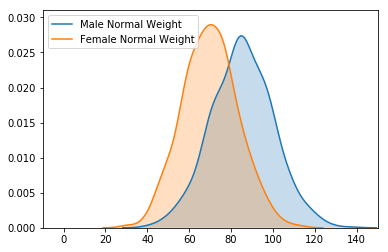

In [9]:
# Plotting distributions on a KDE plot using seaborn
sns.kdeplot(maleWeightDist, shade=True, label="Male Normal Weight")
sns.kdeplot(femaleWeightDist, shade=True, label="Female Normal Weight")

# Control x and y limits 
# Adapted from https://python-graph-gallery.com/44-control-axis-limits-of-plot-seaborn/
plt.ylim(0, 0.031)
plt.xlim(-10, 150)
plt.legend();

Calling the function created above to display the 5th and 95th percentiles shows how the extremes for these distributions differ from the real values:

In [10]:
percentiles5and95(maleWeightDist, femaleWeightDist, "normally distrubuted")

The 5th percentile for normally distrubuted male weight is: 60.7011882131193
(difference from real value is: -3.298811786880698)

The 95th percentile for normally distrubuted male weight is: 109.30109917348332
(difference from real value is: -3.2989008265166717)

The 5th percentile for normally distrubuted female weight is: 48.4497625717507
(difference from real value is: -3.7502374282492994)

The 95th percentile for normally distrubuted female weight is: 92.39229333725139
(difference from real value is: -3.907706662748609)


As would be expected, the results are lower than the positively skewed real values. Also the female values are more skewed than the male values.

We can create a positively skewed distribution using the following code (note that the skewness factor of 0.1 for males and 0.4 for females was chosen as these produced 5th and 95th percentiles similar to the real values):

In [11]:
# Creating a skewed normal distribution for male weight with a skewness factor of 0.1
# The size of the distribution for males is equal to the count of males from the sexArray above
maleWeightSkewedDist = skewnorm.rvs(0.1, loc=meanMaleWeight, scale=maleWeightSD, size=maleCount)

# Creating a skewed normal distribution for female weight with a skewness factor of 0.4
# The size of the distribution for females is equal to the count of females from the sexArray above
femaleWeightSkewedDist = skewnorm.rvs(0.4, loc=meanFemaleWeight, scale=femaleWeightSD, size=femaleCount)

Again we can create Kernal Density Plots for the skewed normal distributions. This shows similar characteristics to the normally distributed weight above.

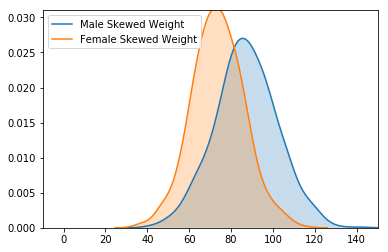

In [12]:
# Plotting distributions on a KDE plot using seaborn
sns.kdeplot(maleWeightSkewedDist, shade=True, label="Male Skewed Weight")
sns.kdeplot(femaleWeightSkewedDist, shade=True, label="Female Skewed Weight")

# Control x and y limits 
# Adapted from https://python-graph-gallery.com/44-control-axis-limits-of-plot-seaborn/
plt.ylim(0, 0.031)
plt.xlim(-10, 150)
plt.legend();

We can compare the normal and skewed weights for females to see what effect the skewing has. There is less values in the skewed distribution near the left tail compared to the normal distribution and more values at the right. This will have the effect of having more people who are obese relative to those who are underweight.

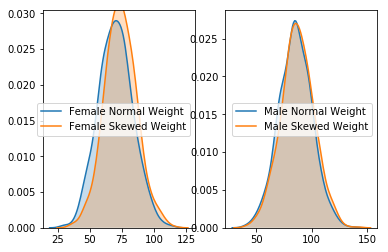

In [13]:
plt.subplot(121)
sns.kdeplot(femaleWeightDist, shade=True, label="Female Normal Weight")
sns.kdeplot(femaleWeightSkewedDist, shade=True, label="Female Skewed Weight")
plt.legend();

plt.subplot(122)
sns.kdeplot(maleWeightDist, shade=True, label="Male Normal Weight")
sns.kdeplot(maleWeightSkewedDist, shade=True, label="Male Skewed Weight")
plt.legend();

We can also see by calling the function to display the 5th and 95th percentiles for this that the skewed normal distribution will give us results that are closer to the real results for the extremes of underweight and obesity 2 and above compared to the normal distribution:

In [14]:
percentiles5and95(maleWeightSkewedDist, femaleWeightSkewedDist, "skewed normally distrubuted")

The 5th percentile for skewed normally distrubuted male weight is: 62.14493247531205
(difference from real value is: -1.8550675246879536)

The 95th percentile for skewed normally distrubuted male weight is: 111.92915728298951
(difference from real value is: -0.6708427170104869)

The 5th percentile for skewed normally distrubuted female weight is: 53.819496456750535
(difference from real value is: 1.6194964567505323)

The 95th percentile for skewed normally distrubuted female weight is: 94.82376458890587
(difference from real value is: -1.4762354110941232)


### Height

Human height is normally distributed [10]. The reason for this is that there are many genetic and envirnomental factors that are involved in height which leads to the large variation [10].

Mean adult (18 to 64 years old) male height is 1.77 m with a standard deviation of 0.07 m [4].
Mean adult (18 to 64 years old) female height is 1.63 m with a standard deviation of 0.06 m [4]

In [15]:
# Setting height variables
maleHeight, femaleHeight = 1.77, 1.63
maleHeightSD, femaleHeightSD = 0.07, 0.06

# Creating height distributions
# The size of the distribution for males and females is equal to the count of males or females from the sexArray above
maleHeightDist = np.random.normal(maleHeight, maleHeightSD, maleCount)
femaleHeightDist = np.random.normal(femaleHeight, femaleHeightSD, femaleCount)

We can now plot the distributions on a KDE plot below. Similar to the weight distributions above, we can see that the peak for male heights is further to the right due to the higher mean. The peak is also smaller and the tails spread further out due to the slightly higher standard deviation (0.7 for males compared to 0.6 for females).

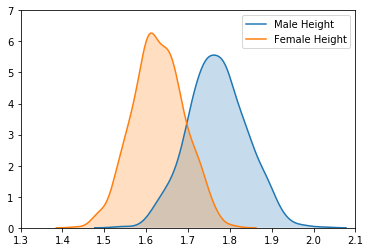

In [16]:
# Plotting distributions on a KDE plot using seaborn
sns.kdeplot(maleHeightDist, shade=True, label="Male Height")
sns.kdeplot(femaleHeightDist, shade=True, label="Female Height")

# Control x and y limits 
# Adapted from https://python-graph-gallery.com/44-control-axis-limits-of-plot-seaborn/
plt.ylim(0, 7)
plt.xlim(1.3, 2.1)
plt.legend();

### BMI

BMI is calculated using the following formula weight(kg)/height(m)^2 [11]. 

This formula was developed by Dr Quetelet in 1835 [11]. 

The reason why height is squared is that this reduces the effect of leg length which can reduce the weight/height ratio [11].

BMI has a number of limitations such as not differentiating between muscle mass and fat mass, and not scaling well for short and tall people [12].

We can create a BMI array from the weight array and height arrays above.

In [17]:
# Creating BMI variable for males from weight and height distributions
maleBMI = maleWeightSkewedDist/maleHeightDist**2

# Creating BMI variable for females from weight and height distributions
femaleBMI = femaleWeightSkewedDist/femaleHeightDist**2

Even though weight and height distributions for males and females differ considerably as could be seen from the comparisons above, the BMI distributions are very similar. 

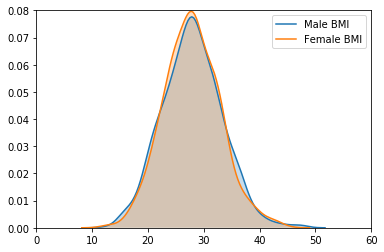

In [18]:
# Plotting distributions on a KDE plot using seaborn
sns.kdeplot(maleBMI, shade=True, label="Male BMI")
sns.kdeplot(femaleBMI, shade=True, label="Female BMI")

# Control x and y limits 
# Adapted from https://python-graph-gallery.com/44-control-axis-limits-of-plot-seaborn/
plt.ylim(0, 0.08)
plt.xlim(0, 60)
plt.legend();

### BMI Categories

There are 11 different BMI categories [12]:

For this data set we will only look at 6:
* Underweight (BMI of <18.5)
* Normal (BMI of 18.5-<25.0)
* Overweight (BMI of 25.0-<30.0)
* Obese 1 (BMI of 30.0-<35.0)
* Obese 2 (BMI of 35.0-<40.0)
* Obese 3 (BMI of >/=40.0)

In [19]:
# Creating categorical array from a continuous array
# Adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html#pandas.cut
# and from https://pandas.pydata.org/pandas-docs/stable/categorical.html

# Creating a DataFrame with a column called Male BMI containing the maleBMI array created above
df = pd.DataFrame({'maleBMI': maleBMI})

# Creating an array which contains the 6 different BMI categories
BMICategories = ["Underweight", "Normal", "Overweight", "Obese 1", "Obese 2", "Obese 3"]

# Assigning the categories to their respective BMI ranges
BMICatArray = pd.cut(df.maleBMI, [0.0, 18.5, 25.0, 30.0, 35.0, 40.0, 1000.0], labels=BMICategories, retbins=True, right=False)

# Creating a new column in DataFrame called 'maleBMICat' and assigning it the BMICatArray
df['maleBMICat'] =BMICatArray[0]

# Displaying the top 5 values
df.head(5)

,maleBMI,maleBMICat
0,27.215267,Overweight
1,32.844705,Obese 1
2,29.788467,Overweight
3,35.028495,Obese 2
4,36.807663,Obese 2


### All-Cause Mortality Hazard Ratios

The hazard ratios for all-cause mortality have been studied for people who are overweight, obese and underweight. The hazard ratio for these weight categories are relative to normal weight [1,2]. The hazard ratios are as follows:
Underweight = 1.37 [2]
Normal = 1 (hazard ratios are relative to normal so this will have a HR of 1) [1,2]
Overweight = 0.94 [1]
Obese 1 = 0.95 [1]
Obese 2 and above = 1.29 [1]

For Obese 1 the value is below 1, therefore it might be assumed that this represents a reduction in all-cause mortality. However, this value is within the margin of error [1].

Surprisingly, being overweight was found to be significantly associated with a lower risk of all cause mortality relative to normal weight [1].

In [20]:
# Creating categorical array from a continuous array
# Adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html#pandas.cut
# and from https://pandas.pydata.org/pandas-docs/stable/categorical.html

# Creating array with Hazard Ratios
HRCategories = [1.37, 1, 0.94, 0.95, 1.29]

# Assigning the categories to their respective BMI ranges
HRArray = pd.cut(maleBMI, [0.0, 18.5, 25.0, 30.0, 35.0, 1000.0], labels=HRCategories, retbins=True, right=False)

# Displaying the array
HRArray

([0.94, 0.95, 0.94, 1.29, 1.29, ..., 1.00, 1.00, 0.94, 0.95, 1.00]
 Length: 993
 Categories (5, float64): [1.37 < 1.00 < 0.94 < 0.95 < 1.29],
 array([    0. ,    18.5,    25. ,    30. ,    35. ,  1000. ]))

## Simulating the Dataset

Finally we will simulate the entire dataset adding each array created above to a Pandas DataFrame.

### Sex

In [21]:
# Creating the DataFrame and adding the Sex column with data from the sexArray

simdf = pd.DataFrame({"Sex": sexArray})

simdf.head(5)

,Sex
0,female
1,male
2,female
3,female
4,male


### Weight

In [22]:
# Adapted from https://stackoverflow.com/questions/46113078/pandas-add-value-at-specific-iloc-into-new-dataframe-column
# and https://stackoverflow.com/questions/46113078/pandas-add-value-at-specific-iloc-into-new-dataframe-column

# Creating a male subset
maledf = simdf.loc[simdf['Sex'] == 'male']

# Creating a female subset
femaledf = simdf.loc[simdf['Sex'] == 'female']

# Creating an index from the male subset
maleRowIndex = maledf.index

# Creating an index from the female subset
femaleRowIndex = femaledf.index

# Initialising Weight column
simdf['Weight'] = 0

# Adding male weights to male rows
simdf['Weight'].loc[simdf['Sex'] == 'male'] = pd.Series(maleWeightSkewedDist, index=maleRowIndex)

# Adding female weights to male rows
simdf['Weight'].loc[simdf['Sex'] == 'female'] = pd.Series(femaleWeightSkewedDist, index=femaleRowIndex)

simdf.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Sex,Weight
0,female,78.822595
1,male,85.574869
2,female,68.757081
3,female,70.169513
4,male,93.485631


### Height

In [23]:
# Initialising height column
simdf['Height'] = 0

# Adding male heights to male rows
simdf['Height'].loc[simdf['Sex'] == 'male'] = pd.Series(maleHeightDist, index=maleRowIndex)

# Adding female heights to male rows
simdf['Height'].loc[simdf['Sex'] == 'female'] = pd.Series(femaleHeightDist, index=femaleRowIndex)

simdf.head(5)

,Sex,Weight,Height
0,female,78.822595,1.657695
1,male,85.574869,1.773237
2,female,68.757081,1.521159
3,female,70.169513,1.525910
4,male,93.485631,1.687096


### BMI

In [24]:
simdf['BMI'] = simdf['Weight']/(simdf['Height'])**2

simdf.head(5)

,Sex,Weight,Height,BMI
0,female,78.822595,1.657695,28.684110
1,male,85.574869,1.773237,27.215267
2,female,68.757081,1.521159,29.714477
3,female,70.169513,1.525910,30.136335
4,male,93.485631,1.687096,32.844705


### BMI Category

In [25]:
BMICategories = ["Underweight", "Normal", "Overweight", "Obese 1", "Obese 2", "Obese 3"]

BMICategoryArray = pd.cut(simdf.BMI, [0.0, 18.5, 25.0, 30.0, 35.0, 40.0, 1000.0], labels=BMICategories, retbins=True, right=False)

simdf['BMI Category'] = BMICategoryArray[0]

simdf.head(5)

,Sex,Weight,Height,BMI,BMI Category
0,female,78.822595,1.657695,28.684110,Overweight
1,male,85.574869,1.773237,27.215267,Overweight
2,female,68.757081,1.521159,29.714477,Overweight
3,female,70.169513,1.525910,30.136335,Obese 1
4,male,93.485631,1.687096,32.844705,Obese 1


### Hazard Ratio Category

In [26]:
HRCategories = [1.37, 1, 0.94, 0.95, 1.29]

HRArray = pd.cut(simdf.BMI, [0.0, 18.5, 25.0, 30.0, 35.0, 1000.0], labels=HRCategories, retbins=True, right=False)

# HRArray returns a 2D array, first row (index 0) contains the values
simdf['Hazard Ratio'] = HRArray[0]

simdf.head(5)

,Sex,Weight,Height,BMI,BMI Category,Hazard Ratio
0,female,78.822595,1.657695,28.684110,Overweight,0.94
1,male,85.574869,1.773237,27.215267,Overweight,0.94
2,female,68.757081,1.521159,29.714477,Overweight,0.94
3,female,70.169513,1.525910,30.136335,Obese 1,0.95
4,male,93.485631,1.687096,32.844705,Obese 1,0.95


### Displaying the entire data set

In [27]:
# Set max rows to 999 to ensure all rows are displayed 
pd.options.display.max_rows = 2000

# Set max columns to 10 to ensure all columns are displayed
pd.options.display.max_columns = 10 

# Displaying the entire data set
simdf

,Sex,Weight,Height,BMI,BMI Category,Hazard Ratio
0,female,78.822595,1.657695,28.684110,Overweight,0.94
1,male,85.574869,1.773237,27.215267,Overweight,0.94
2,female,68.757081,1.521159,29.714477,Overweight,0.94
3,female,70.169513,1.525910,30.136335,Obese 1,0.95
4,male,93.485631,1.687096,32.844705,Obese 1,0.95
5,male,97.400831,1.808245,29.788467,Overweight,0.94
6,female,81.074606,1.697430,28.138512,Overweight,0.94
7,female,61.862845,1.677490,21.984155,Normal,1.00
8,male,105.528289,1.735696,35.028495,Obese 2,1.29
9,female,89.983903,1.600200,35.141189,Obese 2,1.29


In Ireland there is 0.7 % of the population who suffer from underweight (BMI <18.5) and 5.6 % suffer from obesity 2 or higher, both demographics suffer from an increase in all cause mortality (1.37 and 1.29 respectively). We can see below that this data set over estimates these values. With a better skew for the weight distribution this could be improved.

In [28]:
# Adapted from https://stackoverflow.com/questions/12995937/count-all-values-in-a-matrix-greater-than-a-value
arrayUnderweight = (np.where(simdf['BMI']< 18.5))
arrayObese2 = (np.where(simdf['BMI']>= 35.0))

countUnderweight = np.size(arrayUnderweight[0])
countObese2 = np.size(arrayObese2[0])

decimalUnderweight = countUnderweight/len(simdf['BMI'])
decimalObese2 = countObese2/len(simdf['BMI'])

percentUnderweight = decimalUnderweight*100
percentObese2 = decimalObese2*100

print(f"The percentage of those that are underweight is: {percentUnderweight}")
print(f"The percentage of those that are either Obesity 2 or above is: {percentObese2}")

The percentage of those that are underweight is: 3.05
The percentage of those that are either Obesity 2 or above is: 8.450000000000001


## Conclusion

The simulated data set above was created using randomly generated values from real-world values. In the case of sex, the proportion of males to females was calculated and then a list of male and females was generated. The relationship between sex and weight and then sex and height was used to randomly generate values for these variables using the means and standard deviations for the real values. A skewed normal distribution was chosen for the weights as this give similar values for the 5th and 95th percentiles. However, a limitation with this is that it creates different values middle of the distribuiton. From height and weight the BMI could then easily be created. Despite the larger heights and weights of males compared to females, the distribution for BMI was fairly similar for each. From BMI the BMI categories and then the Hazard ration categories where then created. 

The entire data set was then able to be simulated by creating a DataFrame with sex initially and then adding each column. The biggest limitation comes from the fact that the distribution for weight is skewed. Finding a better skew for the weight distribution would create results that are closer to the real values. 

## References

[1] National Center for Biotechnology Information. Association of All-Cause Mortality With Overweight and Obesity Using Standard Body Mass Index Categories.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/


[2] National Center for Biotechnology Information. Mortality risk associated with underweight: a census-linked cohort of 31,578 individuals with up to 32 years of follow-up.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4021191/

 
[3] Very Well Health. All-Cause Mortality and Your Health.
https://www.verywellhealth.com/what-is-all-cause-mortality-2223349

 
[4] Irish Universities Nutrition Alliance. National Adult Nutrition Survey 
https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf


[5] Index Mundi. Ireland Demographics Profile 2018.
https://www.indexmundi.com/ireland/demographics_profile.html 


[6] Proceedings of the National Academy of Sciences. The human sex ratio from conception to birth
https://www.pnas.org/content/112/16/E2102


[7] Wikipedia. Human sex ratio.
https://en.wikipedia.org/wiki/Human_sex_ratio#Factors_affecting_sex_ratio_in_humans


[8] National Center for Biotechnology Information. Body weight and the shape of the natural distribution of weight, in very large samples of German, Austrian and Norwegian conscripts.
https://www.ncbi.nlm.nih.gov/pubmed/11673780


[9] Research Gate. The Changing Shape of the Body Mass Index Distribution Curve in the Population: Implications for Public Health Policy to Reduce the Prevalence of Adult Obesity
https://www.researchgate.net/publication/7006581_The_Changing_Shape_of_the_Body_Mass_Index_Distribution_Curve_in_the_Population_Implications_for_Public_Health_Policy_to_Reduce_the_Prevalence_of_Adult_Obesity


[10] John D. Cook. Why heights are normally distributed.
https://www.johndcook.com/blog/2008/07/20/why-heights-are-normally-distributed/


[11] Nutrition Today. Body Mass Index: Obesity, BMI, and Health A Critical Review 
https://journals.lww.com/nutritiontodayonline/Fulltext/2015/05000/Body_Mass_Index__Obesity,_BMI,_and_Health_A.5.aspx 


[12] Wikipedia. Body mass index.
https://en.wikipedia.org/wiki/Body_mass_index
